In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Mi binomial

In [2]:
def binomial(p):
    ran = np.random.rand()
    if (ran > p):
        return  0
    else:
        return 1

In [3]:
n = 1000

nums =[]

for i in range(n):
    nums.append(binomial(0.8))
    

### Comparamos Mi Binomial con la de Numpy... Aguanta

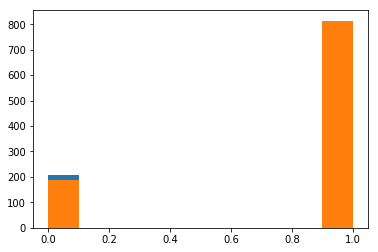

In [4]:
np_binomial = np.random.binomial(1,0.8,1000)

_ = plt.hist(np_binomial)
_ = plt.hist(nums)

## Kinetic Gas Theory

#### Generamos velocidades "Gaussianas"

In [59]:
vx = np.random.normal(loc=0.0, scale=1.0, size=100000)
vy = np.random.normal(loc=0.0, scale=1.0, size=100000)
vz = np.random.normal(loc=0.0, scale=1.0, size=100000)

#### Grafivcamos rapideces 2D

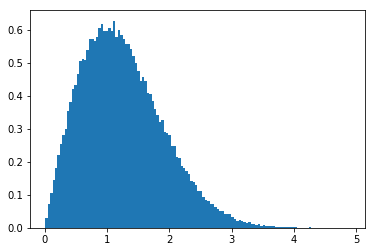

In [84]:

n_2D, bins_2D, patches_2D = plt.hist(np.sqrt(vx*vx + vy*vy), bins='auto', density='True')


#### Grafivcamos rapideces 3D

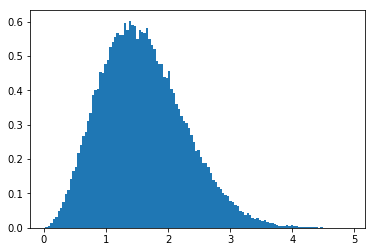

In [85]:
n_3D, bins_3D, patches_3D = plt.hist(np.sqrt(vx*vx + vy*vy + vz*vz), bins='auto', density='True')


#### Encontramos centros de los "bins" para usarlos como datos para el fit

In [86]:
bc_3D = bins_3D[:-1] + np.diff(bins_3D) / 2
bc_2D = bins_2D[:-1] + np.diff(bins_2D) / 2

#### Definimos funciones para hacer los fit

In [87]:
def Dist_3D(v,A):
    return (2.0/np.pi)**0.5 * (A)**1.5 *v*v * np.exp(-A*v*v/2.0)

In [88]:
def Dist_2D(v,A):
    return A *v*np.exp(-A*v*v/2.0)

In [89]:
from scipy.optimize import curve_fit

#### Fit!!!!

In [90]:
param_3D, pcov_3D = curve_fit(Dist_3D,bc_3D, n_3D )
param_2D, pcov_2D = curve_fit(Dist_2D,bc_2D, n_2D )

### Plots de histogramas con curva obtenida... Melo

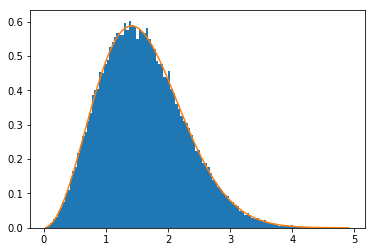

In [91]:
_ = plt.hist(np.sqrt(vx*vx + vy*vy + vz*vz), bins='auto', density='True')
plt.plot(bc_3D, Dist_3D(bc_3D,*param_3D))

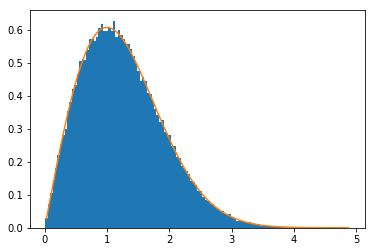

In [92]:
_ = plt.hist(np.sqrt(vx*vx + vy*vy), bins='auto', density='True')
plt.plot(bc_2D, Dist_2D(bc_2D,*param_2D))

#### Calculamos R² de los fit... Melos...

In [96]:
R2_3D = 1 - np.var(Dist_3D(bc_3D,*param_3D)-n_3D)/np.var(n_3D)
R2_2D = 1 - np.var(Dist_2D(bc_2D,*param_2D)-n_2D)/np.var(n_2D)

In [97]:
R2_3D

0.9985890690493336

In [98]:
R2_2D

0.9989832669404035

#### Ubicamos $v_p$

In [105]:
A_3D = param_3D

In [114]:
vp = bc_3D[np.argmax(Dist_3D(bc_3D,*param_3D))]
vp

1.4275019080400648

#### En nuestro fit el parametro $A = \frac{m}{kT}$, por lo tanto $v_p = \sqrt{\frac{2}{A}}$

In [110]:
np.sqrt(2/A_3D)

array([1.41347572])

### Comprobamos $⟨v⟩$

In [117]:
v_mean = np.mean(np.sqrt(vx*vx + vy*vy + vz*vz))
v_mean

1.5962089523173357

In [119]:
2.0*vp/np.sqrt(np.pi)

1.6107634140215035

# Poisson limit

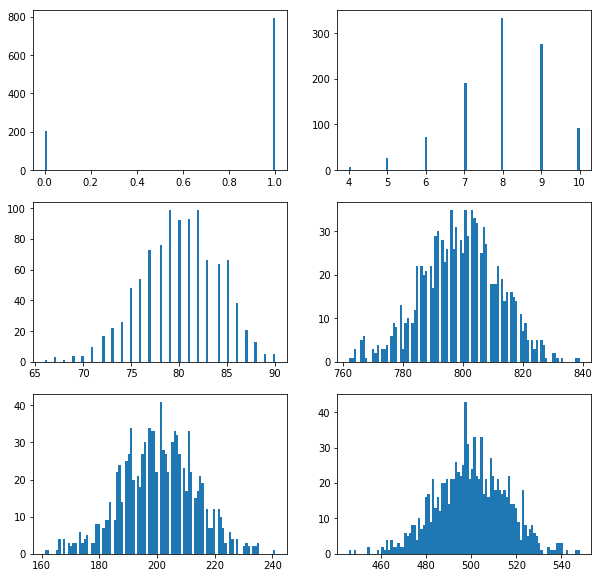

In [127]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(321)
_ = ax.hist(np.random.binomial(1,0.8, size=1000), bins=100)

ax = fig.add_subplot(322)
_ = ax.hist(np.random.binomial(10,0.8, size=1000), bins=100)

ax = fig.add_subplot(323)
_ = ax.hist(np.random.binomial(100,0.8, size=1000), bins=100)

ax = fig.add_subplot(324)
_ = ax.hist(np.random.binomial(1000,0.8, size=1000), bins=100)

ax = fig.add_subplot(325)
_ = ax.hist(np.random.binomial(1000,0.2, size=1000), bins=100)

ax = fig.add_subplot(326)
_ = ax.hist(np.random.binomial(1000,0.5, size=1000), bins=100)

In [135]:
n = 100000
p = 0.77
lamb = n*p

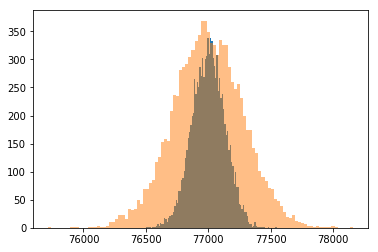

In [136]:
_ = plt.hist(np.random.binomial(n,p, size=10000), bins=100)
_ = plt.hist(np.random.poisson(lam=lamb, size=10000), bins=100, alpha=0.5)

## Expected

In [142]:
def Expected(px):
    x = np.arange(0,len(px))
    return np.sum(x*x*px)

In [143]:
def test1():
    px = np.array([ 0.01720472,  0.23565573,  0.7425048 ,  0.68060143,  0.25665851])
    res = 13.437623957331406
    ans = Expected(px)
    return (abs(res-ans) < 0.00001)

In [144]:
test1()

True